# House Price Prediction

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from model_utils import report, cv_scores

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

## Data Preprecessing

### Importing the dataset

In [2]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

### Splitting the dataset into the Training set and Test set 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [4]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

y_train_sc = sc_y.fit_transform(y_train)
y_test_sc = sc_y.transform(y_test)

## Training the ANN model

In [5]:
seed_value = 1107

import random
random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

np.random.seed(seed_value)

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

### Grid Search

In [6]:
def create_model(optimizer='adam'):
  # Initializing the ANN
  model = Sequential()

  # Adding the first hidden layer
  model.add(Dense(256, activation='relu'))

  # Adding the second hidden layer
  model.add(Dense(128, activation='relu'))

  # Adding the third hidden layer
  model.add(Dense(128, activation='relu'))

  # Adding the output layer
  model.add(Dense(1, activation='linear'))

  # Compiling the ANN
  model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
  return model

model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10)

optimizer = ['SGD', 'RMSprop', 'Adam']
init_mode = ['uniform', 'normal']

param = {'optimizer': optimizer}

grid = GridSearchCV(estimator=model, param_grid=param, scoring='r2', cv = 5)
grid_result = grid.fit(X_train_sc, y_train_sc)

model=grid_result.best_estimator_
y_pred = model.predict(X_test_sc)

Epoch 1/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6751 - mae: 0.6542
Epoch 2/100
70/70 [==============================] - 0s 1ms/step - loss: 0.1918 - mae: 0.3497
Epoch 3/100
70/70 [==============================] - 0s 1ms/step - loss: 0.1346 - mae: 0.2843
Epoch 4/100
70/70 [==============================] - 0s 1ms/step - loss: 0.1018 - mae: 0.2537
Epoch 5/100
70/70 [==============================] - 0s 1ms/step - loss: 0.0970 - mae: 0.2511
Epoch 6/100
70/70 [==============================] - 0s 1ms/step - loss: 0.1012 - mae: 0.2429
Epoch 7/100
70/70 [==============================] - 0s 1ms/step - loss: 0.0883 - mae: 0.2278
Epoch 8/100
70/70 [==============================] - 0s 1ms/step - loss: 0.0850 - mae: 0.2244
Epoch 9/100
70/70 [==============================] - 0s 1ms/step - loss: 0.0641 - mae: 0.1911
Epoch 10/100
70/70 [==============================] - 0s 1ms/step - loss: 0.0546 - mae: 0.1791
Epoch 11/100
70/70 [==============================] - 0s 1m

### Cross Validation

In [7]:
print('CV Score:', round(grid_result.best_score_, 5))

CV Score: 0.91381


### Testing data

,Value
Metric,
R2 Score,0.922918
MAE,38966.350201
RMSE,58121.083906


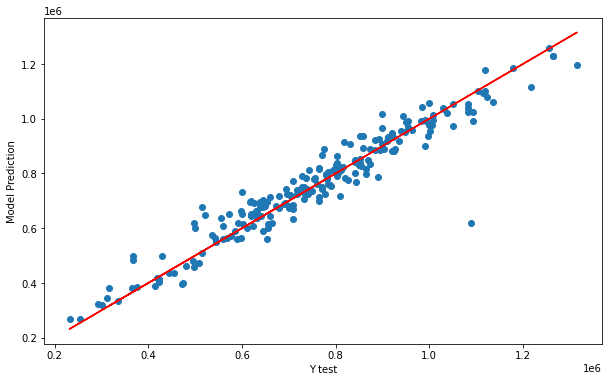

In [8]:
y_pred = model.predict(X_test_sc)

report(y_test, sc_y.inverse_transform(y_pred))

In [9]:
model.model.save('ann.h5')